## Análisis diferencial del campo fluido

### Divergencia del flujo

Vamos a comenzar con un ejemplo. Supongamos que tenemos un pistón que desliza longitudinalmente por un conducto recto en el que hay un fluido. Al desplazar el pistón de izquierda a derecha, se genera un campo de velocidad que involucra velocidades mayores en la zona cercana al pistón y menores en la zona más alejada. Entre ambas zonas existirá un **gradiente longitudinal de velocidad**. El campo de velocidades en un instante dado es el siguiente:

$$ u=  1.5-\frac{1}{1+\exp{(-3(x-3))}},\quad v=w=0  $$

En la siguiente figura se muestra el sistema conducto-pistón y se representa este campo de velocidad para un instante de tiempo.

0.6824

1.3176

-0.6351

0.5

0.5006

-0.0005

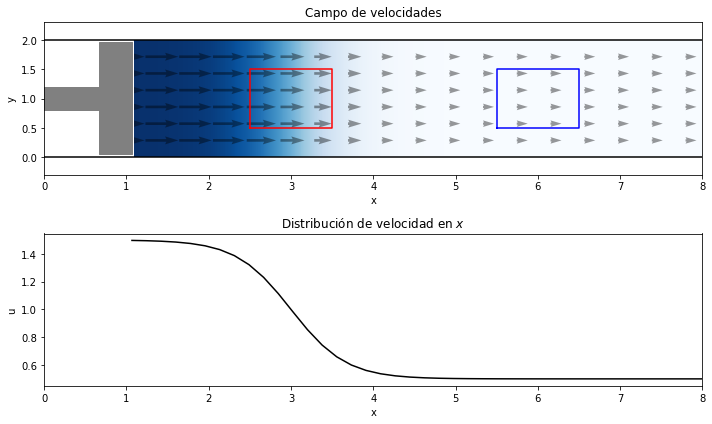

In [151]:
import math
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from myst_nb import glue
from scipy.interpolate import Rbf
from matplotlib import animation
from IPython.display import HTML

nq=2        #separacion entre vectores en quiver plot
Nx=40
Ny=8
Lx=8.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(x):
    return (1.0-1.0/(1.0+np.exp(-3*(x-3.0))))+0.5

def dUdx(x):
    return -(3* np.exp(-3 *(-3 + x)))/(1 + np.exp(-3*(-3 + x)))**2

t=0.0
U = velU(X)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax,ax2) = plt.subplots(2,1,figsize=(10, 6))
ax.contourf(X,Y,velU(X),256,cmap="Blues")
Q = ax.quiver(X[1:Ny-1,4:Nx-1:nq], Y[1:Ny-1,4:Nx-1:nq], U[1:Ny-1,4:Nx-1:nq], V[1:Ny-1,4:Nx-1:nq],alpha=0.4,scale=30,width=0.004)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=1.5)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=1.5)
rect1 = plt.Rectangle((0, 0), Lx/12+0.205*Lx/4, Ly, color='white')
ax.add_patch(rect1)
rect2 = plt.Rectangle((Lx/12, 0.03*Ly), 0.2*Lx/4, 0.95*Ly, color='gray')
ax.add_patch(rect2)
rect3 = plt.Rectangle((0, 1-0.1*Ly), Lx/12, 0.2*Ly, color='gray')
ax.add_patch(rect3)
ax.set_title("Campo de velocidades")

xp = np.linspace(Lx/12+0.2*Lx/4, Lx, Nx)
T1D=velU(xp)
ax2.plot(xp, T1D, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u")
ax2.set_xlim([0, Lx])
ax2.set_title("Distribución de velocidad en $x$")

xc=3.0
yc=1.0
delta=0.5
ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], 'r-',linewidth=1.5)
vr=velU(xc+delta)
vl=velU(xc-delta)
div=(vr-vl)/(2*delta)
qr=vr*2*delta
ql=vl*2*delta

glue("var_qr1", np.round_(qr,4))
glue("var_ql1", np.round_(ql,4))
glue("var_div1", np.round_(div,4))

xc=6.0
yc=1.0
delta=0.5
ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], 'b-',linewidth=1.5)
vr=velU(xc+delta)
vl=velU(xc-delta)
div=(vr-vl)/(2*delta)
qr=vr*2*delta
ql=vl*2*delta

glue("var_qr2", np.round_(qr,4))
glue("var_ql2", np.round_(ql,4))
glue("var_div2", np.round_(div,4))

plt.tight_layout()
glue("div_fig", fig, display=False)

```{glue:} div_fig
```
El mapa de colores indica la magnitud de la velocidad (azul, más velocidad; blanco, menos velocidad). La longitud de los vectores también nos indica la magnitud de la velocidad. Además, vemos que la velocidad está orientada en el eje $x$. 

Hemos definido dos volúmenes iguales, uno de ellos centrado en $x=3$ m (en rojo) y otro en $x=6$ m (en azul). Si calculamos el flujo volumétrico neto en cada uno de estos volúmenes obtenemos lo siquiente:

- En el volumen rojo: el flujo de entrada es {glue:text}`var_ql1` m$^3$/s,  el flujo de salida es {glue:text}`var_qr1` m$^3$/s y el flujo neto es {glue:text}`var_div1` m$^3$/s. Se observa que está entrando más flujo del que está saliendo, y por tanto el flujo neto es distinto de cero, es decir, hay una acumulación. Esto se debe a que el pistón genera un gradiente espacial (variación longitudinal) de velocidad en la zona en la que se sitúa este volumen.

- En el volumen azul: el flujo de entrada es {glue:text}`var_ql2` m$^3$/s,  el flujo de salida es {glue:text}`var_qr2` m$^3$/s y el flujo neto es {glue:text}`var_div2` m$^3$/s. Se observa que el flujo de entrada y de salida son prácticamente iguales, por lo tanto no hay acumulación. Esto se debe a que en esta zona, no existe gradiente de velocidad.

Con estos resultados, vemos que existe una relación entre la acumulación de flujo en un volumen y el gradiente espacial de velocidad. Esto nos permite introducir el concepto de **divergencia de la velocidad**.

```{admonition} Divergencia de la velocidad
:class: tip
La divergencia de la velocidad se define como el flujo neto por unidad de volumen que atraviesa la superficie de un volumen de control $V$ cuando éste tiende a cero:

$$
div(\vec{\bf{v}}):= \nabla \cdot \vec{\bf{v}} = \lim_{V\rightarrow 0} \frac{1}{V} \int_{\partial V}  \vec{\bf{v}} \cdot \hat{\bf{n}} dS
$$

y se calcula como

$$
\nabla \cdot \vec{\bf{v}} = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} + \frac{\partial w}{\partial z}
$$

```

Volviendo al ejemplo anterior, podemos calcular la divergencia de la velocidad utilizando esta expresión. Dado que la velocidad sólo tiene componente en $x$, la divergencia de la velocidad será:

$$
\nabla \cdot \vec{\bf{v}} = \frac{\partial u}{\partial x} =   3\frac{\exp{(-3(x-3))}}{(1+\exp{(-3(x-3))})^2} 
$$

que depende de $x$.

A continuación se representa el sistema conducto-pistón, junto con la distribución espacial de velocidad y su divergencia (en naranja). Nótese que la curva naranja es la representación gráfica de la expresión analítica de la divergencia de la velocidad, obtenida anteriormente. Se observa que la divergencia de la velocidad es siempre negativa, ya que la velocidad decrece monótonamente con $x$. Además, se observa que la divergencia de la velocidad es máxima (en magnitud) en $x=3$ m. Lejos de ese punto, la divergencia de la velocidad es cercana a cero.

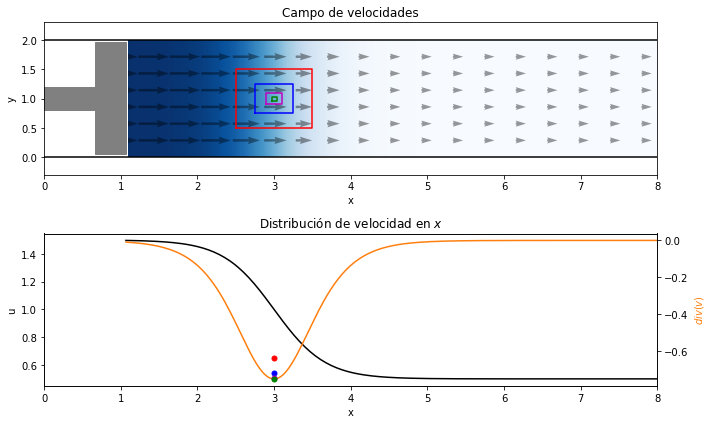

In [178]:
nq=2        #separacion entre vectores en quiver plot
Nx=40
Ny=8
Lx=8.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(x):
    return (1.0-1.0/(1.0+np.exp(-3*(x-3.0))))+0.5

def dUdx(x):
    return -(3* np.exp(-3 *(-3 + x)))/(1 + np.exp(-3*(-3 + x)))**2

t=0.0
U = velU(X)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax,ax2) = plt.subplots(2,1,figsize=(10, 6))
ax.contourf(X,Y,velU(X),256,cmap="Blues")
Q = ax.quiver(X[1:Ny-1,4:Nx-1:nq], Y[1:Ny-1,4:Nx-1:nq], U[1:Ny-1,4:Nx-1:nq], V[1:Ny-1,4:Nx-1:nq],alpha=0.4,scale=30,width=0.004)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=1.5)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=1.5)
rect1 = plt.Rectangle((0, 0), Lx/12+0.205*Lx/4, Ly, color='white')
ax.add_patch(rect1)
rect2 = plt.Rectangle((Lx/12, 0.03*Ly), 0.2*Lx/4, 0.95*Ly, color='gray')
ax.add_patch(rect2)
rect3 = plt.Rectangle((0, 1-0.1*Ly), Lx/12, 0.2*Ly, color='gray')
ax.add_patch(rect3)
ax.set_title("Campo de velocidades")

xp = np.linspace(Lx/12+0.2*Lx/4, Lx, 200)
T1D=velU(xp)
ax2.plot(xp, T1D, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u")
ax2.set_xlim([0, Lx])
ax2.set_title("Distribución de velocidad en $x$")

axR = ax2.twinx()
deriv=dUdx(xp)
axR.plot(xp, deriv, color='tab:orange')
axR.set_ylabel("$div(v)$",color='tab:orange')

xc=3.0
yc=1.0

colors=["r","b","m","g","y"]
sizes=[1,2,5,15]

for i in range(0,4):
    delta=0.5/sizes[i]
    ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], '-',color=colors[i],linewidth=1.5)
    vr=velU(xc+delta)
    vl=velU(xc-delta)
    div=(vr-vl)/(2*delta)
    axR.plot(xc, div, '.',color=colors[i],ms=10)

plt.tight_layout()
glue("aprox_fig", fig, display=False)


```{glue:} aprox_fig
```

Hemos visto que la divergencia de la velocidad se define como el límite del flujo neto por unidad de volumen que atraviesa la superficie de un volumen de control $V$ cuando éste tiende a cero. Para mostrar gráficamente el concepto de divergencia de la velocidad, hemos aproximado su valor en $x=3$ m utilizando los distintos volúmenes representados en la figura mediante el siguiente cálculo

$$
div(\vec{\bf{v}}) \approx \frac{1}{V} \int_{\partial V}  \vec{\bf{v}} \cdot \hat{\bf{n}} dS
$$

y su valor numérico se ha representado con el color correspondiente en la gráfica. Se observa que **conforme se disminuye el tamaño del volumen, el valor numérico se aproxima más al valor exacto** proporcionado en la curva naranja.

````{admonition} A recordar...
:class: note
Según el valor de la divergencia de la velocidad, podemos distinguir entre:

- Flujo compresible: $\nabla \cdot \vec{\bf{v}}\neq 0$

```{figure} images/Imagen8.png
---
width: 160px
name: cap1-fig8
---
Flujo compresible: hay acumulación de masa en el volumen.
```

- Flujo incompresible: $\nabla \cdot \vec{\bf{v}} = 0$

```{figure} images/Imagen9.png
---
width: 250px
name: cap1-fig9
---
Flujo incompresible: no hay acumulación de masa en el volumen.
```

que es independiente de la compresibilidad del fluido.
````

### Rotacional de la velocidad

Como en la sección previa, vamos a ilustrar este concepto con un ejemplo. Supongamos que tenemos un flujo viscoso en movimiento entre dos placas paralelas en reposo, separadas una distancia de 2 m. Como veremos en el tema 3, el perfil de velocidad entre las placas es parabólico. El campo de velocidades viene dado por la siguiente expresión:

$$ u=  1-(y-1)^2,\quad v=w=0  $$

existiendo un **gradiente transversal de velocidad** en dirección $y$.

En la siguiente figura se muestra el sistema y se representa este campo de velocidad.

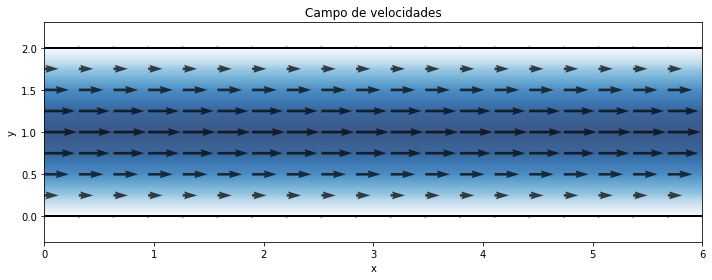

In [207]:
nq=1        #separacion entre vectores en quiver plot
Nx=20
Ny=9
Lx=6.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(y):
    return 1-(y-1)**2


t=0.0
U = velU(Y)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax) = plt.subplots(figsize=(10, 4))
ax.contourf(X,Y,velU(Y),256,cmap="Blues",alpha=0.8)
Q = ax.quiver(X, Y, U, V,alpha=0.7,scale=20,width=0.004)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=2)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=2)

ax.set_title("Campo de velocidades")

plt.tight_layout()
glue("rot0_fig", fig, display=False)

```{glue:} rot0_fig
```

En la figura se observa que la velocidad es máxima en el centro del dominio ($y=1$ m) y es nula junto a las placas. El gradiente transversal de velocidad involucra la rotación del fluido. Para ello, vamos a colocar unos *molinillos* en distintos puntos del dominio y vamos a ver en qué sentido giran.

Text(0.5, 1.0, 'Campo de velocidades')

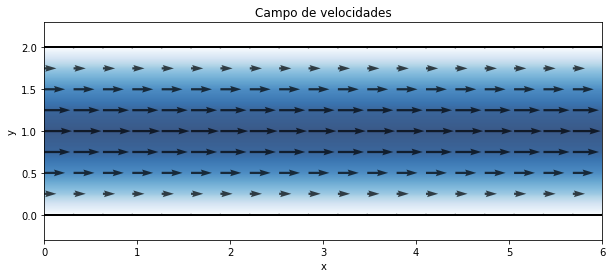

In [213]:
nq=1        #separacion entre vectores en quiver plot
Nx=20
Ny=9
Lx=6.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(y):
    return 1-(y-1)**2

def divV(y):
    return -2*(y-1)

t=0.0
U = velU(Y)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax) = plt.subplots(figsize=(10, 4))
ax.contourf(X,Y,velU(Y),256,cmap="Blues",alpha=0.8)
Q = ax.quiver(X, Y, U, V,alpha=0.7,scale=20,width=0.004)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=2)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=2)

ax.set_title("Campo de velocidades")